1000


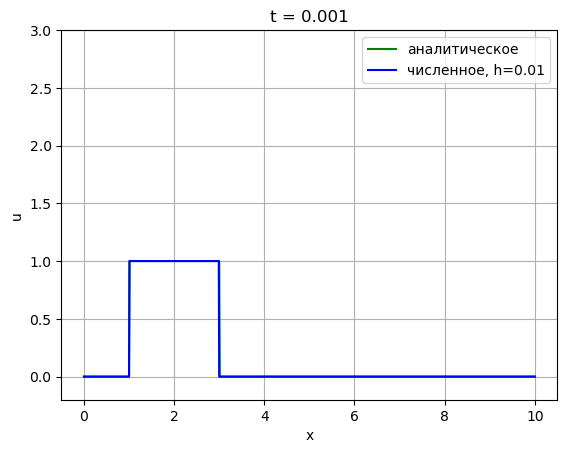

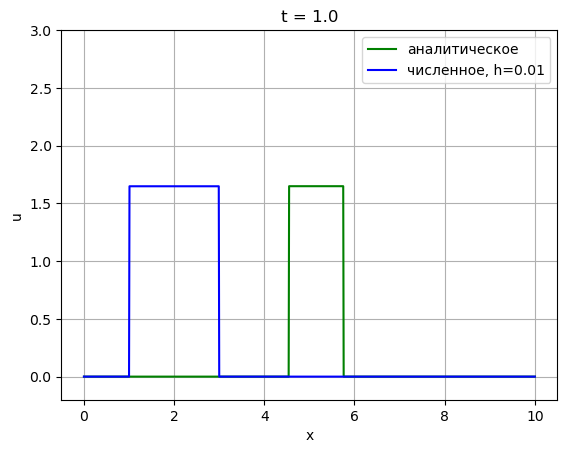

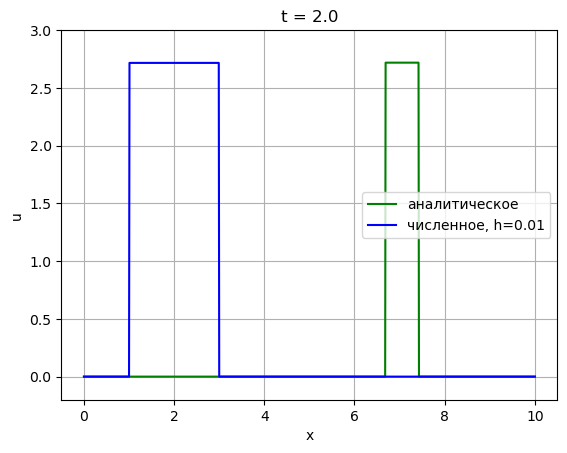

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def ploting(x, t, u):
    plt.plot(x, real(x, t[n]), color='g', label='аналитическое')
    plt.plot(x, u, color='b', label=f'численное, h={h1}')
    plt.ylim(-0.2, 3)
    plt.xlabel('x')
    plt.ylabel('u')                              #построение графиков
    plt.title(f't = {round(t[n], 3)}')
    plt.grid()
    plt.legend()
    plt.show()

h1 = 10 ** (-2)
x0 = 2
eps = 1
a = 0
b = 10
l = b - a
T = 2
v = 5
const = 0.7
tau1 = h1 * const / np.abs(v)

x1 = np.linspace(a, b, int((b - a) / h1) + 1)
M1 = len(x1)
t1 = np.linspace(0, T, int(T / tau1) + 1)
T1 = len(t1)

def ksi(x):
    return np.abs(x - x0) / eps

def phi1(x):
    return np.heaviside(1 - ksi(x), 0)

def phi2(x):
    return phi1(x) * (1 - (ksi(x)) ** 2)

def phi3(x):
    return phi1(x) * (np.cos((np.pi / 2) * ksi(x))) ** 3


def real(x, t):
    return np.heaviside(x - l*(1-np.exp(-v*t/l)), 0) * np.exp(v*t/l)*phi1(l - (l-x)*np.exp(v * t/ l))

u_0 = phi1
u0x = u_0(x1)
mu = np.zeros(T1)

def f(u, x):
    return v*(1-x/l)*u


def f_u(x):
    return v*(1-x/l)


def a1(x):
    return f_u(x + h1 / 2)


def a2(x):
    return f_u(x - h1 / 2)


def u1_up(u, x):
    return np.heaviside(a1(x), 0) * u + np.heaviside(-a1(x), 0) * u


def u2_up(u, x):
    return np.heaviside(a2(x), 0) * u + np.heaviside(-a2(x), 0) * u


def F1_up(u, x):
    return f(u1_up(u, x), x + h1 / 2)


def F2_up(u, x):
    return f(u2_up(u, x), x - h1 / 2)

for n in range(1, T1):
    u1 = np.zeros(M1)
    F1 = F1_up(u0x[1:], x1[1:])
    F2 = F2_up(u0x[1:], x1[1:])
    u1[1:] = u0x[1:] - (tau1 / h1) * (F1 - F2)
    u1[0] = mu[n]
    if n == 1:
        print(len(F1))
        ploting(x1, t1, u1)
    elif n == T1 // 2:
        ploting(x1, t1, u1)
    elif n == T1 - 1:
        ploting(x1, t1, u1)
    u0x = u1